In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [51]:
# Load dataset
url = "https://goo.gl/mLmoIz"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
print(dataset)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [63]:
#another way to load
new = datasets.load_iris()
X = new.data
Y=new.target
Y_new = (new.target > 1.5).reshape(-1,1)
#np.hstack((X,Y))
#Lesson:(150,) means 1 row 150 cols. It's reversed! (150,1) is regular, thus always reshape  to make sure

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]

In [64]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


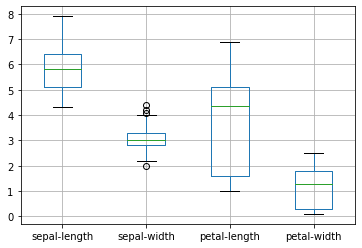

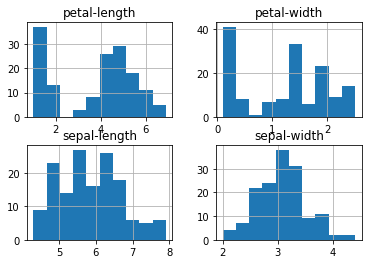

In [75]:
dataset.boxplot()
dataset.hist()
plt.show()

In [106]:
#split data
array = dataset.values
X = array[:,:4]
Y = array[:,4]
seed = 7
np.random.seed(seed)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.33,random_state=seed)
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
print(rescaled_X_train.shape,Y_train.shape)
#lesson: X_train,X_test,Y_train,Y_test when train test spliting. X is split into first two, y second two.
#potential PCA

(100, 4) (100,)


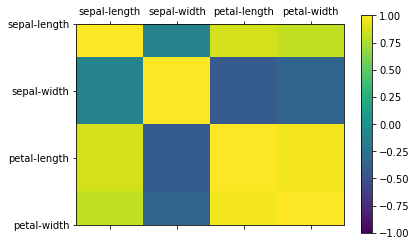

In [88]:
#correlation matrix
fig,ax = plt.subplots()
cax = ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [114]:
#try out models
estimators = []
#estimators.append(('scaler',StandardScaler()))
estimators.append(('LR',LogisticRegression()))
estimators.append(('CART',DecisionTreeClassifier()))
estimators.append(('SVM',SVC()))
estimators.append(('KNN',KNeighborsClassifier()))
estimators.append(('LDA',LinearDiscriminantAnalysis()))
estimators.append(('NB',GaussianNB()))
estimators.append(('Ada',AdaBoostClassifier()))
estimators.append(('Grad',GradientBoostingClassifier()))
estimators.append(('Ran',RandomForestClassifier()))
estimators.append(('Extra',ExtraTreesClassifier()))
#ready = Pipeline(estimators)
results = []
results_name=[]
results_nonscaled=[]
for name, model in estimators:
    kfold = model_selection.KFold(n_splits = 10,random_state=seed)
    result = model_selection.cross_val_score(model, rescaled_X_train,Y_train,cv=kfold,scoring='accuracy')
    result_nonscaled = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(result)
    results_nonscaled.append(result_nonscaled)
    results_name.append(name)
    print("%s %f %f" % (name,result.mean(),result.std()))
    print("%s %f %f" % (name,result_nonscaled.mean(),result_nonscaled.std()))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\g

LR 0.880000 0.132665
LR 0.970000 0.045826
CART 0.960000 0.048990
CART 0.970000 0.045826
SVM 0.970000 0.045826
SVM 0.980000 0.040000
KNN 0.940000 0.066332
KNN 0.960000 0.066332
LDA 0.970000 0.045826
LDA 0.970000 0.045826
NB 0.970000 0.045826
NB 0.970000 0.045826
Ada 0.960000 0.048990
Ada 0.960000 0.048990
Grad 0.960000 0.048990
Grad 0.960000 0.048990


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Ran 0.970000 0.045826
Ran 0.960000 0.048990


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Extra 0.960000 0.048990
Extra 0.970000 0.045826


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

SVM seems better, standardized version of X generally does better

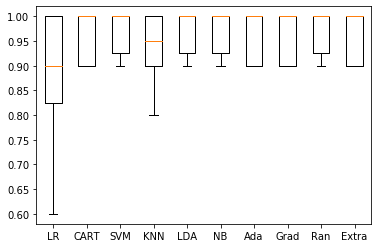

In [116]:
fig,ax = plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(results_name)
plt.show()

In [121]:
#tuning param for SVM
C_list = [0.1,1,10,100,1000]
kernel_list = ['linear','poly','rbf','sigmoid']
param_grid = dict(C=C_list,kernel=kernel_list)
model_tuning = SVC()
grid = GridSearchCV(model_tuning,param_grid,scoring='accuracy',cv=kfold)
grid_result = grid.fit(rescaled_X_train, Y_train)
print(grid_result.best_params_,grid_result.best_score_)
#potentially turning more params under linear kernel

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

{'C': 0.1, 'kernel': 'linear'} 0.97


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [124]:
model_best = SVC(C=0.1,kernel='linear')
best_fit = model_best.fit(rescaled_X_train,Y_train)
rescaled_X_test = scaler.transform(X_test)
pred = best_fit.predict(rescaled_X_test)
print(accuracy_score(Y_test,pred))
print(classification_report(Y_test,pred))



0.94
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.94      0.92        18
 Iris-virginica       0.94      0.89      0.91        18

       accuracy                           0.94        50
      macro avg       0.95      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50



In [ ]:
#save model if needed
import pickle
filename = 'kk'
pickle.dump(best_fit, open(filename,'wb')) #save model
#loaded_model = pickle.load(open(filename,'rb'))
#result = loaded_model.score(X_test,Y_test)

In [ ]:
#try what if using pipelines inside every term of estimators instead of directly rescaling X
#try out models
estimators = []
#estimators.append(('scaler',StandardScaler()))
estimators.append(('scaler',StandardScaler()),('LR',LogisticRegression()))
estimators.append(('CART',DecisionTreeClassifier()))
estimators.append(('SVM',SVC()))
estimators.append(('KNN',KNeighborsClassifier()))
estimators.append(('LDA',LinearDiscriminantAnalysis()))
estimators.append(('NB',GaussianNB()))
estimators.append(('Ada',AdaBoostClassifier()))
estimators.append(('Grad',GradientBoostingClassifier()))
estimators.append(('Ran',RandomForestClassifier()))
estimators.append(('Extra',ExtraTreesClassifier()))
#ready = Pipeline(estimators)
results = []
results_name=[]
results_nonscaled=[]
for name, model in estimators:
    kfold = model_selection.KFold(n_splits = 10,random_state=seed)
    result = model_selection.cross_val_score(model, rescaled_X_train,Y_train,cv=kfold,scoring='accuracy')
    result_nonscaled = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(result)
    results_nonscaled.append(result_nonscaled)
    results_name.append(name)
    print("%s %f %f" % (name,result.mean(),result.std()))
    print("%s %f %f" % (name,result_nonscaled.mean(),result_nonscaled.std()))